# 2603655_DataAcquisition

## Week12 20241029

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
* [Tableau](https://public.tableau.com/app/profile/yuttapong.m/vizzes)
---

ref:
- [perplexity:NLP](https://www.perplexity.ai/page/nlp-radabphuuenthaan-3nOx9HZVS_ae5ZRwlr9vVw)
- [perplexity:RegEx](https://www.perplexity.ai/page/regular-expressions-in-python-jTm0K1iFRSi24HmW3NJfTA)
- [perplexity:HuggingFace](https://www.perplexity.ai/page/hugging-face-token-guide-Ze2MvWjYRIiSkNaFBDWAlw)

In [1]:
import datetime
print(datetime.datetime.now())

2024-11-06 10:03:37.717181


## RegEx

### RegEX in string data
 - `re.search`
 - `re.match`
 - `re.findall`
 - `re.finditer` (+ for loop i.group())

#### FLAG
- `re.IGNORECASE`
- `re.MULTILINE` or `re.M` : combination with `^` for match all line
- `re.DOTALL` or `re.S`  : search through new line
- `re.VERBOSE` or `re.X`
- `re.ASCII` or `re.A`
- `re.DEBUG`
- `re.LOCALE` or `re.L`

In [ ]:
import re

text = "สวัสดีครับ ผมชื่อ John"
result = re.search(r'John', text)       # find anywhere in string data
print(f'result from re.search {result}')

text = "สวัสดีครับ ผมชื่อ John"
result = re.match(r'John', text)        # match only at start of string
print(f'result from re.match {result}')

text = "HELLO world"
result = re.search(r'hello', text)
print(f'result when not use flag: {result}')

text = "HELLO world"
result = re.search(r'hello', text, re.IGNORECASE)    # ignore case
print(f'result when use flag: re.IGNORECASE {result}')

result from re.search <re.Match object; span=(18, 22), match='John'>
result from re.match None
result when not use flag: None
result when use flag: re.IGNORECASE <re.Match object; span=(0, 5), match='HELLO'>


In [ ]:
import re

# Sample multi-line text
text = """Hello there, World
Goodbye there, World
Hello everyone, World
Just a simple line
Hello again, World
World Hello
"""
# r'\d'   # Matches a digit.
# '\\d'   # match but harder to read

# Regular expression pattern with re.M
pattern = r'^Hello.*World$'

# Using re.MULTILINE to match start and end of each line
matches = re.findall(pattern, text, re.MULTILINE)

# Print the matches found
print("Matches found:")
for match in matches:
    print(match)


['Hello there, World', 'Hello everyone, World', 'Hello again, World']


In [4]:
import re

# Sample multi-line text
text = """This is a sample text.
<start>
This text is
spanning multiple lines.
<end>
This is outside the tags."""

# Regular expression to find text between <start> and <end> tags
pattern = r'<start>(.*?)<end>'

# Using the regex without re.DOTALL
matches_no_dotall = re.findall(pattern, text)

print("Matches found without DOTALL:", matches_no_dotall)


Matches found without DOTALL: []


In [5]:
import re

# Sample text containing phone numbers
text = """
Here are some phone numbers:
(123) 456-7890
(987) 654-3210
Call me at (555) 123-4567 or (444) 222-3333!
"""

# Regular expression with re.X for clarity
pattern = r"""
    \(\d{3}\)      # Area code in parentheses
    \s             # Space after area code
    \d{3}          # First three digits
    -              # Hyphen
    \d{4}          # Last four digits
"""

# Using re.X to enable verbose mode
matches = re.findall(pattern, text, re.VERBOSE)

# Print the matches found
print("Matches found:")
for match in matches:
    print(match)


Matches found:
(123) 456-7890
(987) 654-3210
(555) 123-4567
(444) 222-3333


In [6]:
text = "ฉันชอบกินส้ม กล้วย และส้ม"
result = re.findall(r'ส้ม', text)
print(f'result from re.findall: {result}')   # list

result = re.findall(r'มะละกอ', text)
print(f'result from re.findall: {result}')   # list

result from re.findall: ['ส้ม', 'ส้ม']
result from re.findall: []


In [7]:
text = "เบอร์โทรของฉันคือ 02-123-4567 และ 081-234-5678"
result = re.findall(r'\d{2,3}-\d{3}-\d{4}', text)
print(result)  # ['02-123-4567', '081-234-5678']

['02-123-4567', '081-234-5678']


In [8]:
text = "เบอร์โทรของฉันคือ 02-123-4567 และ 081-234-5678"
result = re.finditer(r'\d{2,3}-\d{3}-\d{4}', text)

for i in result:
    print(i.group())

02-123-4567
081-234-5678


In [9]:
text = "เบอร์โทรของฉันคือ 02-123-4567 และ 081-234-5678"
result = re.finditer(r'\d{2,3}-\d{3}-\d{4}', text)

matches = [i.group() for i in result]
matches


['02-123-4567', '081-234-5678']

In [10]:
text = "เบอร์โทรของฉันคือ 02-123-4567 และ 081-234-5678"
result = re.finditer(r'\d{2,3}-\d{3}-\d{4}', text)

matches = [i for i in result]
matches


[<re.Match object; span=(18, 29), match='02-123-4567'>,
 <re.Match object; span=(34, 46), match='081-234-5678'>]

### RegEx in Df
- `str.startswith`
- `str.endswith`
- `str.contains`
- `str.replace`
  - Series.str.replace(pat, repl, n=-1, case=None, regex=True) => n: no.for replacement
- `str.extract`
- `str.findall`
- `str.split`

In [11]:
import pandas as pd

# Sample data for the DataFrame
data = {
    "full name": ["Alice Johnson", "Bob Smith", "Charlie Brown", "Diana Prince", "Evan Thomas"],
    "id": ["A001", "B002", "C003", "D004", "E005"],
    "education": ["Bachelor's", "Master's", "PhD", "Bachelor's", "Associate"],
    "university": ["University A", "University B", "University C", "University D", "University E"],
    "tel number": ["02-123-4567", "081-234-5678", "03-456-7890", "082-345-6789", "04-567-8901"],
    "zipcode": ["AB1001", "CD2002", "EF3003", "GH4004", "IJ5005"]
}

# Create the DataFrame
df = pd.DataFrame(data)

print(df)


       full name    id   education    university    tel number zipcode
0  Alice Johnson  A001  Bachelor's  University A   02-123-4567  AB1001
1      Bob Smith  B002    Master's  University B  081-234-5678  CD2002
2  Charlie Brown  C003         PhD  University C   03-456-7890  EF3003
3   Diana Prince  D004  Bachelor's  University D  082-345-6789  GH4004
4    Evan Thomas  E005   Associate  University E   04-567-8901  IJ5005


In [12]:
# Series.str.contains(pat, case=True, flags=0, na=None, regex=True)

df[df['education'].str.contains(r'\'s')] # regex = True (default)

,full name,id,education,university,tel number,zipcode
0,Alice Johnson,A001,Bachelor's,University A,02-123-4567,AB1001
1,Bob Smith,B002,Master's,University B,081-234-5678,CD2002
3,Diana Prince,D004,Bachelor's,University D,082-345-6789,GH4004


In [13]:
df[df['education'].str.contains('[MB]')]

,full name,id,education,university,tel number,zipcode
0,Alice Johnson,A001,Bachelor's,University A,02-123-4567,AB1001
1,Bob Smith,B002,Master's,University B,081-234-5678,CD2002
3,Diana Prince,D004,Bachelor's,University D,082-345-6789,GH4004


In [14]:
df['university'] = df['university'].str.replace('University', 'School')
df

,full name,id,education,university,tel number,zipcode
0,Alice Johnson,A001,Bachelor's,School A,02-123-4567,AB1001
1,Bob Smith,B002,Master's,School B,081-234-5678,CD2002
2,Charlie Brown,C003,PhD,School C,03-456-7890,EF3003
3,Diana Prince,D004,Bachelor's,School D,082-345-6789,GH4004
4,Evan Thomas,E005,Associate,School E,04-567-8901,IJ5005


In [15]:
df['zipcode_character']= df['zipcode'].str.extract('(\w[a-zA-Z]+)')
df['zipcode_number']= df['zipcode'].str.extract('(\d+)')
df

,full name,id,education,university,tel number,zipcode,zipcode_character,zipcode_number
0,Alice Johnson,A001,Bachelor's,School A,02-123-4567,AB1001,AB,1001
1,Bob Smith,B002,Master's,School B,081-234-5678,CD2002,CD,2002
2,Charlie Brown,C003,PhD,School C,03-456-7890,EF3003,EF,3003
3,Diana Prince,D004,Bachelor's,School D,082-345-6789,GH4004,GH,4004
4,Evan Thomas,E005,Associate,School E,04-567-8901,IJ5005,IJ,5005


In [16]:
df['match']= df['tel number'].str.findall('[-]')  # list
df

,full name,id,education,university,tel number,zipcode,zipcode_character,zipcode_number,match
0,Alice Johnson,A001,Bachelor's,School A,02-123-4567,AB1001,AB,1001,"[-, -]"
1,Bob Smith,B002,Master's,School B,081-234-5678,CD2002,CD,2002,"[-, -]"
2,Charlie Brown,C003,PhD,School C,03-456-7890,EF3003,EF,3003,"[-, -]"
3,Diana Prince,D004,Bachelor's,School D,082-345-6789,GH4004,GH,4004,"[-, -]"
4,Evan Thomas,E005,Associate,School E,04-567-8901,IJ5005,IJ,5005,"[-, -]"


In [17]:
df[['first_name', 'last_name']] = df['full name'].str.split(r'\s+', expand=True)
df

,full name,id,education,university,tel number,zipcode,zipcode_character,zipcode_number,match,first_name,last_name
0,Alice Johnson,A001,Bachelor's,School A,02-123-4567,AB1001,AB,1001,"[-, -]",Alice,Johnson
1,Bob Smith,B002,Master's,School B,081-234-5678,CD2002,CD,2002,"[-, -]",Bob,Smith
2,Charlie Brown,C003,PhD,School C,03-456-7890,EF3003,EF,3003,"[-, -]",Charlie,Brown
3,Diana Prince,D004,Bachelor's,School D,082-345-6789,GH4004,GH,4004,"[-, -]",Diana,Prince
4,Evan Thomas,E005,Associate,School E,04-567-8901,IJ5005,IJ,5005,"[-, -]",Evan,Thomas


In [18]:
df['new'] = df['full name'].str.split(r'\s+')
df

,full name,id,education,university,tel number,zipcode,zipcode_character,zipcode_number,match,first_name,last_name,new
0,Alice Johnson,A001,Bachelor's,School A,02-123-4567,AB1001,AB,1001,"[-, -]",Alice,Johnson,"[Alice, Johnson]"
1,Bob Smith,B002,Master's,School B,081-234-5678,CD2002,CD,2002,"[-, -]",Bob,Smith,"[Bob, Smith]"
2,Charlie Brown,C003,PhD,School C,03-456-7890,EF3003,EF,3003,"[-, -]",Charlie,Brown,"[Charlie, Brown]"
3,Diana Prince,D004,Bachelor's,School D,082-345-6789,GH4004,GH,4004,"[-, -]",Diana,Prince,"[Diana, Prince]"
4,Evan Thomas,E005,Associate,School E,04-567-8901,IJ5005,IJ,5005,"[-, -]",Evan,Thomas,"[Evan, Thomas]"


## Lecture

### convert data to JSON file

#### Blognone

In [2]:
import pandas as pd
import zipfile
from bs4 import BeautifulSoup
import textwrap

zipf =zipfile.ZipFile('data/blognone.zip','r')
filenames = zipf.namelist()
type(filenames)

list

In [ ]:
corpus_content = list()

# for filename in filenames[:1]:
for filename in filenames:
    html_file =zipf.open(filename)
    html_string = html_file.read().decode('utf-8')
    html_file.close()

    html_soup = BeautifulSoup(html_string, 'html.parser')
    # print(html_soup.prettify())
    
    title_box = html_soup.find('div', class_='content-title-box')
    title = title_box.find('a').get('title')
    # print(title)
    
    content_box = html_soup.find('div', class_='field field-name-body field-type-text-with-summary field-label-hidden')
    # print(context_box.text)
    content = content_box.text
    content = content.replace('\n','').replace('  ','')
    # print(textwrap.fill(content,width=120))
    
    corpus_content.append({'title': title,
                           'content': content,
                           })
zipf.close()

df_corpus = pd.DataFrame(corpus_content)
df_corpus.info()
df_corpus.head()
display(df_corpus.head())
df_corpus.to_json('data/blognone.json', orient='table', force_ascii=False, indent=2)
print('done')

#### Khaosod

In [ ]:
import zipfile
from bs4 import BeautifulSoup
import textwrap
import pandas as pd

zipf = zipfile.ZipFile('data/khaosod.zip','r')
filenames = zipf.namelist()

corpus_content = list()

# for filename in filenames[:1]:
for filename in filenames:
  # use string name from list to get html string data, read, and close
  html_file = zipf.open(filename)
  html_string = html_file.read().decode('utf-8')
  html_file.close()

  html_soup = BeautifulSoup(html_string,'html.parser')
  # print(html_soup.prettify())

  title_box = html_soup.find('h1',class_='udsg__main-title')
  title = title_box.text.strip()
  # print(title)

  content_box = html_soup.find('div',class_='udsg__content')
  content = ''
  for p in content_box.find_all('p'):
    content += p.text
  content = content.replace('\n','').replace('  ','').strip()
  # print(textwrap.fill(content,width=120))

  corpus_content.append({'title':title,
                         'content':content
                        })
zipf.close()

df_corpus = pd.DataFrame(corpus_content)  # data as dict of dict
df_corpus.info()
display(df_corpus.head())
df_corpus.to_json('data/khaosod.json',orient='table',force_ascii=False,indent=2)  
# force_ascii = False  => thai font as is
print('done')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    52 non-null     object
 1   content  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


,title,content
0,หลาก&หลายไอที - อลังการไลน์อัพโน้ตบุ๊กAI เลอโ...,เลอโนโวเปิดตัวผลิตภัณฑ์ใหม่ล่าสุดของไลน์อัพ Le...
1,หลาก&หลายไอที - อลังการแอปเปิ้ลอีเวนต์ ชูไอโฟ...,นอกจากสินค้าเรือธงอย่าง iPhone 16 series ซึ่งแ...
2,สาวกห้ามพลาด เทียบราคา iPhone16 ถูกกว่า iPhone15,สาวก Apple ห้ามพลาด เทียบราคา iPhone16 ถูกกว่า...
3,หลาก&หลายไอที - ‘แผ่นพิมพ์วงจรไฟฟ้า’โอกาสไทย-ผ...,ประเทศไทยกำลังอยู่ในช่วงหัวเลี้ยวหัวต่อสำคัญขอ...
4,หลาก&หลายไอที - ‘แผ่นพิมพ์วงจรไฟฟ้า’ โอกาสไทย...,แผ่นพิมพ์วงจรไฟฟ้าหรือ พีซีบีเป็นรากฐานที่สำคั...


done


### read json to df

In [21]:
# !pip install pythainlp

In [22]:
import pandas as pd

df_blognone = pd.read_json('data/blognone.json',orient='table')
df_khaosod = pd.read_json('data/khaosod.json',orient='table')
df = pd.concat([df_blognone,df_khaosod])
content = ''.join(df['content'].tolist())

# print(len(content))
# print(content[:200])
f = open('data/content.txt','w',encoding='utf-8')
f.write(content)
f.close()
print('done')

done


### Tokenization

#### tokenize 1-gram by dict-newmm

In [23]:
from pythainlp.tokenize import word_tokenize,Tokenizer

f = open('data/content.txt','r',encoding='utf-8')
content = f.read()
f.close()

tokens = [token for token in word_tokenize(content,engine='newmm')
                             if len(token) > 1]
print(tokens[:50])
print(len(tokens))

['ใน', 'ช่วง', 'ปี', 'ที่ผ่านมา', 'วงการ', 'เกม', 'มี', 'ความเคลื่อนไหว', 'มากขึ้น', 'จาก', 'กระแส', 'ที่', 'กลับมา', 'ของ', 'Handheld', 'Console', 'หรือ', 'เครื่องเล่นเกม', 'พกพา', 'ที่', 'ได้ประโยชน์', 'จาก', 'พัฒนาการ', 'ด้าน', 'ฮาร์ดแวร์', 'ที่', 'แรง', 'มากขึ้น', 'ระดับ', 'หนึ่ง', 'จน', 'สามารถ', 'นำ', 'สโตร์', 'เกม', 'อันดับ', 'อย่าง', 'Steam', 'มา', 'อยู่', 'ใน', 'ขนาดที่', 'พกพา', 'ได้', 'ROG', 'เป็นหนึ่ง', 'ใน', 'แบรนด์', 'ที่', 'ดู']
55218


#### tokenize 2-gram by dict-newmm

In [24]:
from pythainlp.corpus import thai_words
from nltk import ngrams
from collections import Counter

f = open('data/content.txt','r',encoding='utf-8')
content = f.read()
f.close()

tokens = [token for token in word_tokenize(content,engine='newmm')
                             if len(token) > 1]

bigrams = ngrams(tokens,2)
bigrams_freq = Counter(bigrams)
for common_gram in bigrams_freq.most_common(20):
  print(common_gram)

(('สมาร์ต', 'โฟน'), 92)
(('ที่', 'มี'), 90)
(('ความ', 'ละเอียด'), 86)
(('มา', 'พร้อม'), 77)
(('เอ', 'ไอ'), 68)
(('ใน', 'การ'), 65)
(('เล่น', 'เกม'), 57)
(('เอ', 'ซุส'), 57)
(('ไม่', 'ได้'), 52)
(('จาก', 'ค่าย'), 52)
(('ว่า', 'จะ'), 50)
(('ช่วย', 'ให้'), 47)
(('ได้', 'อย่าง'), 47)
(('พีซี', 'บี'), 47)
(('ตัว', 'เครื่อง'), 45)
(('ขุม', 'พลัง'), 44)
(('ROG', 'Phone'), 44)
(('ใน', 'ปี'), 43)
(('ด้วย', 'การ'), 43)
(('ไม่', 'ว่า'), 39)


#### tokenize 2-gram by LLR (log-likelihood ratio)

In [25]:
from pythainlp.corpus import thai_words
from pythainlp.tokenize import word_tokenize
from pythainlp.util import dict_trie
import math
from collections import Counter
import re

def calculate_llr(k11, k12, k21, k22):
  """
  Calculate Log-Likelihood Ratio
  k11: frequency of word pair
  k12: frequency of word1 without word2
  k21: frequency of word2 without word1
  k22: frequency of neither word
  """
  n = k11 + k12 + k21 + k22
  row1 = k11 + k12
  row2 = k21 + k22
  col1 = k11 + k21
  col2 = k12 + k22

  # Avoid division by zero
  def ll(k, n, x):
    if k == 0:
      return 0
    return k * math.log(k / (n * x))

  # Calculate LLR
  llr = 2 * (ll(k11, n, (row1 * col1) / (n * n)) +
             ll(k12, n, (row1 * col2) / (n * n)) +
             ll(k21, n, (row2 * col1) / (n * n)) +
             ll(k22, n, (row2 * col2) / (n * n)))

  return llr

def is_english(text):
  return bool(re.search(r'[a-zA-Z]', text))

f = open('data/content.txt','r',encoding='utf-8')
content = f.read()
f.close()


# Tokenize text
tokens = [token for token in word_tokenize(content,engine='newmm')
                          if len(token)>1]

# Create word pairs (bigrams)
word_pairs = [(tokens[i], tokens[i+1]) for i in range(len(tokens)-1)]

# Count frequencies
pair_counts = Counter(word_pairs)
word_counts = Counter(tokens)
total_words = len(tokens)

# Calculate LLR for each pair
llr_scores = {}
for pair, pair_freq in pair_counts.items():
  word1, word2 = pair
  k11 = pair_freq
  k12 = word_counts[word1] - pair_freq
  k21 = word_counts[word2] - pair_freq
  k22 = total_words - k11 - k12 - k21

  llr_scores[pair] = calculate_llr(k11, k12, k21, k22)

# Print top collocations
custom_dict_words = list()
for pair, score in sorted(llr_scores.items(), key=lambda x: x[1], reverse=True)[:20]:
  if is_english(pair[0]) and is_english(pair[1]):
    print(f"Word pair: {' '.join(pair)}, LLR score: {score:.2f}")
    custom_dict_words.append(' '.join(pair))
  else:
    print(f"Word pair: {''.join(pair)}, LLR score: {score:.2f}")
    custom_dict_words.append(''.join(pair))
print(custom_dict_words)

Word pair: สมาร์ตโฟน, LLR score: 1159.93
Word pair: ความละเอียด, LLR score: 956.91
Word pair: เอไอ, LLR score: 769.40
Word pair: เอซุส, LLR score: 709.63
Word pair: พีซีบี, LLR score: 661.65
Word pair: ขุมพลัง, LLR score: 631.81
Word pair: ทีมข่าวสด, LLR score: 591.21
Word pair: ข่าวสดไอที, LLR score: 585.42
Word pair: ROG Phone, LLR score: 566.31
Word pair: เล่นเกม, LLR score: 511.57
Word pair: มาพร้อม, LLR score: 498.89
Word pair: วางจำหน่าย, LLR score: 481.55
Word pair: อัลตร้า, LLR score: 465.64
Word pair: พียู, LLR score: 410.51
Word pair: หน่วยประมวลผล, LLR score: 410.32
Word pair: จากค่าย, LLR score: 396.50
Word pair: ระบายความร้อน, LLR score: 391.48
Word pair: iPad Air, LLR score: 363.10
Word pair: AMD Ryzen, LLR score: 362.79
Word pair: ตัวเครื่อง, LLR score: 358.07
['สมาร์ตโฟน', 'ความละเอียด', 'เอไอ', 'เอซุส', 'พีซีบี', 'ขุมพลัง', 'ทีมข่าวสด', 'ข่าวสดไอที', 'ROG Phone', 'เล่นเกม', 'มาพร้อม', 'วางจำหน่าย', 'อัลตร้า', 'พียู', 'หน่วยประมวลผล', 'จากค่าย', 'ระบายความร้อน', 'iPad A

##### custom dict (thai_words + custom_dict_words by LLR)

In [26]:
f = open('data/content.txt','r',encoding='utf-8')
content = f.read()
f.close()

custom_words = set(thai_words())
# print(len(custom_words))
custom_words = custom_words.union(set(custom_dict_words))
# print(len(custom_words))

tokenizer = Tokenizer(custom_dict=custom_words,engine='newmm')
tokens = [token for token in tokenizer.word_tokenize(content) if len(token) > 1]
for word in custom_dict_words:
  print(f'{word} occurs {tokens.count(word)} times')

สมาร์ตโฟน occurs 92 times
ความละเอียด occurs 86 times
เอไอ occurs 68 times
เอซุส occurs 57 times
พีซีบี occurs 47 times
ขุมพลัง occurs 44 times
ทีมข่าวสด occurs 0 times
ข่าวสดไอที occurs 39 times
ROG Phone occurs 44 times
เล่นเกม occurs 59 times
มาพร้อม occurs 90 times
วางจำหน่าย occurs 36 times
อัลตร้า occurs 27 times
พียู occurs 27 times
หน่วยประมวลผล occurs 32 times
จากค่าย occurs 52 times
ระบายความร้อน occurs 32 times
iPad Air occurs 25 times
AMD Ryzen occurs 27 times
ตัวเครื่อง occurs 48 times


##### Save custom dict(custom_words) to json

In [27]:
custom_dict_words.remove('ทีมข่าวสด')
custom_dict_words.remove('ข่าวสดไอที')
custom_dict_words.append('ทีมข่าวสดไอที')

df_custom_words = pd.DataFrame({'custom':custom_dict_words})
df_custom_words.to_json('data/custom_words.json',orient='table')
print('done')

done


In [28]:
f = open('data/content.txt','r',encoding='utf-8')
content = f.read()
f.close()

custom_words = set(thai_words())
# print(len(custom_words))
custom_words = custom_words.union(set(custom_dict_words))
# print(len(custom_words))

tokenizer = Tokenizer(custom_dict=custom_words,engine='newmm')
tokens = [token for token in tokenizer.word_tokenize(content) if len(token) > 1]
for word in custom_dict_words:
  print(f'{word} occurs {tokens.count(word)} times')

สมาร์ตโฟน occurs 92 times
ความละเอียด occurs 86 times
เอไอ occurs 68 times
เอซุส occurs 57 times
พีซีบี occurs 47 times
ขุมพลัง occurs 44 times
ROG Phone occurs 44 times
เล่นเกม occurs 59 times
มาพร้อม occurs 90 times
วางจำหน่าย occurs 36 times
อัลตร้า occurs 27 times
พียู occurs 27 times
หน่วยประมวลผล occurs 32 times
จากค่าย occurs 52 times
ระบายความร้อน occurs 32 times
iPad Air occurs 25 times
AMD Ryzen occurs 27 times
ตัวเครื่อง occurs 48 times
ทีมข่าวสดไอที occurs 39 times


In [29]:
print(len(tokens))

54263


### Vectorization - BoW | CountVect | TF-IDF

In [30]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

documents = [
    "the cat is on the mat",
    "the dog is in the yard",
    "the cat and the dog are playing"
]

print("Original documents:")
for i, doc in enumerate(documents):
  print(f"Document {i+1}: {doc}")

print("\n## Bag of Words (Binary)")
vocabulary = sorted(set(" ".join(documents).split()))
bow_vectors = []
for doc in documents:
  vector = {word: 1 if word in doc.split() else 0 for word in vocabulary}
  bow_vectors.append(vector)

bow_df = pd.DataFrame(bow_vectors, index=[f"Doc {i+1}" for i in range(len(documents))])
print("BoW DataFrame:")
print(bow_df)

print("\n## Count Vectorizer")
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents)
count_df = pd.DataFrame(
  count_matrix.toarray(),
  columns=count_vectorizer.get_feature_names_out(),
  index=[f"Doc {i+1}" for i in range(len(documents))]
)
print("Count Vectorizer DataFrame:")
print(count_df)

print("\n## TF-IDF")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(
  tfidf_matrix.toarray(),
  columns=tfidf_vectorizer.get_feature_names_out(),
  index=[f"Doc {i+1}" for i in range(len(documents))]
)
print("TF-IDF DataFrame:")
display(tfidf_df)


Original documents:


Document 1: the cat is on the mat
Document 2: the dog is in the yard
Document 3: the cat and the dog are playing

## Bag of Words (Binary)
BoW DataFrame:
       and  are  cat  dog  in  is  mat  on  playing  the  yard
Doc 1    0    0    1    0   0   1    1   1        0    1     0
Doc 2    0    0    0    1   1   1    0   0        0    1     1
Doc 3    1    1    1    1   0   0    0   0        1    1     0

## Count Vectorizer
Count Vectorizer DataFrame:
       and  are  cat  dog  in  is  mat  on  playing  the  yard
Doc 1    0    0    1    0   0   1    1   1        0    2     0
Doc 2    0    0    0    1   1   1    0   0        0    2     1
Doc 3    1    1    1    1   0   0    0   0        1    2     0

## TF-IDF
TF-IDF DataFrame:


,and,are,cat,dog,in,is,mat,on,playing,the,yard
Doc 1,0.000000,0.000000,0.356457,0.000000,0.000000,0.356457,0.468699,0.468699,0.000000,0.553642,0.000000
Doc 2,0.000000,0.000000,0.000000,0.356457,0.468699,0.356457,0.000000,0.000000,0.000000,0.553642,0.468699
Doc 3,0.424396,0.424396,0.322764,0.322764,0.000000,0.000000,0.000000,0.000000,0.424396,0.501310,0.000000


### modeling - CountVect | TF-IDF

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

df_blognone = pd.read_json('data/blognone.json',orient='table')
df_khaosod = pd.read_json('data/khaosod.json',orient='table')
df = pd.concat([df_blognone,df_khaosod])

df_custom_words = pd.read_json('data/custom_words.json',orient='table')
custom_dict_words = df_custom_words['custom'].to_list()

custom_words = set(thai_words())
custom_words = custom_words.union(set(custom_dict_words))

tokenizer = Tokenizer(custom_dict=custom_words,engine='newmm')

def my_tokenizer(text):
  tokens = [token for token in tokenizer.word_tokenize(text)
                            if len(token) > 1]
  return tokens

cv = CountVectorizer(tokenizer=my_tokenizer,max_df=0.95,min_df=0.1)
tfidf = TfidfVectorizer(tokenizer=my_tokenizer,max_df=0.95,min_df=0.1)

count_matrix = cv.fit_transform(df['content'].tolist())
tfidf_matrix = tfidf.fit_transform(df['content'].tolist())

print(count_matrix.shape)
print(tfidf_matrix.shape)

(102, 549)
(102, 549)


#### Calculate sparsity | density

In [32]:
def calculate_sparsity(mx):
  total_elements = mx.shape[0] * mx.shape[1]
  non_zero_elements = mx.nnz
  zero_elements = total_elements - non_zero_elements
  sparsity = zero_elements / total_elements
  return sparsity

print('COUNT')
print(f'sparsity = {calculate_sparsity(count_matrix)}')
print(f'density = {1-calculate_sparsity(count_matrix)}')
print()
print('TF-IDF')
print(f'sparsity = {calculate_sparsity(tfidf_matrix)}')
print(f'density = {1-calculate_sparsity(tfidf_matrix)}')


COUNT
sparsity = 0.76765241615772
density = 0.23234758384228005

TF-IDF
sparsity = 0.76765241615772
density = 0.23234758384228005


In [33]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf.vocabulary_)
df_tfidf

,ใน,ช่วง,ปี,ที่ผ่านมา,วงการ,เกม,มี,มากขึ้น,จาก,กลับมา,...,ภัย,เรียบ,มินิ,ตอบสนอง,สร้างสรรค์,มิติ,สวย,แอพพลิเคชั่น,(mp),การถ่ายภาพ
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.089697,0.03627,0.0,0.125517,0.000000,0.0,0.0,0.024235,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.051064,0.00000,0.0,0.095275,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.065779,0.0,0.000000,0.000000,...,0.0,0.037263,0.00000,0.0,0.069526,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.030252,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.061646,0.00000,0.0,0.230037,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.039237,0.00000,0.0,0.073209,0.000000,0.0,0.0,0.063609,0.000000
98,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.049731,0.00000,0.0,0.061859,0.000000,0.0,0.0,0.000000,0.000000
99,0.0,0.024412,0.027307,0.0,0.0,0.0,0.000000,0.0,0.022627,0.024921,...,0.0,0.033766,0.00000,0.0,0.105000,0.024921,0.0,0.0,0.127725,0.000000
100,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.072044,0.158693,...,0.0,0.000000,0.00000,0.0,0.033432,0.000000,0.0,0.0,0.000000,0.044606



## Week13 20241105

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from pythainlp.tokenize import word_tokenize,Tokenizer
from pythainlp.corpus import thai_words

df_blognone = pd.read_json('data/blognone.json',orient='table')
df_khaosod = pd.read_json('data/khaosod.json',orient='table')
df = pd.concat([df_blognone,df_khaosod])

df_custom_words = pd.read_json('data/custom_words.json',orient='table')
custom_dict_words = df_custom_words['custom'].to_list()

custom_words = set(thai_words())
custom_words = custom_words.union(set(custom_dict_words))

tokenizer = Tokenizer(custom_dict=custom_words,engine='newmm')

def my_tokenizer(text):
  tokens = [token for token in tokenizer.word_tokenize(text)
                            if len(token) > 1]
  return tokens

cv = CountVectorizer(tokenizer=my_tokenizer,max_df=0.95,min_df=0.1)
tfidf = TfidfVectorizer(tokenizer=my_tokenizer,max_df=0.95,min_df=0.1)

count_matrix = cv.fit_transform(df['content'].tolist())
tfidf_matrix = tfidf.fit_transform(df['content'].tolist())

print(count_matrix.shape)
print(tfidf_matrix.shape)

(102, 549)
(102, 549)


In [35]:
def calculate_sparsity(mx):
  total_elements = mx.shape[0] * mx.shape[1]
  non_zero_elements = mx.nnz
  zero_elements = total_elements - non_zero_elements
  sparsity = zero_elements / total_elements
  return sparsity

print('COUNT')
print(f'sparsity = {calculate_sparsity(count_matrix)}')
print(f'density = {1-calculate_sparsity(count_matrix)}')
print()
print('TF-IDF')
print(f'sparsity = {calculate_sparsity(tfidf_matrix)}')
print(f'density = {1-calculate_sparsity(tfidf_matrix)}')


COUNT
sparsity = 0.76765241615772
density = 0.23234758384228005

TF-IDF
sparsity = 0.76765241615772
density = 0.23234758384228005


In [36]:
set(cv.vocabulary_.keys())-set(tfidf.vocabulary_.keys())

set()

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import textwrap

def identify_similarity(cosine_matrix,num_pair):
  mask = np.triu(np.ones_like(cosine_matrix,dtype=bool),k=1)
  top_indices = np.argpartition(cosine_matrix[mask],-1*num_pair)[-1*num_pair:]
  top_indices = top_indices[np.argsort(cosine_matrix[mask][top_indices])[::-1]]

  rows,cols = np.where(mask)
  top_pairs = [(rows[i],cols[i]) for i in top_indices]
  for i,j in top_pairs:
    print('----------')
    print(f'similarity score:{cosine_matrix[i][j]:0.4f}')
    print(f'document {i}: {df.iloc[i]["title"]}')
    print(textwrap.fill(df.iloc[i]['content'][:400],width=120))
    print()
    print(f'document {j}: {df.iloc[j]["title"]}')
    print(textwrap.fill(df.iloc[j]['content'][:400],width=120))
    print('----------')

cosine_count = cosine_similarity(count_matrix)
cosine_tfidf = cosine_similarity(tfidf_matrix)

identify_similarity(cosine_count,2)
identify_similarity(cosine_tfidf,2)



----------
similarity score:0.8348
document 57: หลาก&หลาย เอซุสผุดโน้ตบุ๊กใหม่ ชิพ AMD ฉลาดล้ำด้วย AI
เอซุส (ประเทศไทย)ร่วมกับ AMDเปิดตัวโน้ตบุ๊กและเกมมิ่งโน้ตบุ๊ก ASUS Next-level AI PCs6 รุ่น นำโดย Zenbook S 16
(UM5606)พรีเมียมโน้ตบุ๊ก ดีไซน์เรียบหรู ให้ประสิทธิภาพการทำงานระดับสูงVivobook S 14 (D5406WA) โน้ตบุ๊กขนาด 14 นิ้ว
พร้อมความมินิมอล พกพาสะดวก และ ProArt P16 (H7606) / PX13 (HN7306) ครีเอเตอร์โน้ตบุ๊กสำหรับการทำงานระดับมืออาชีพ
พร้อมเปิดตัวโน้ตบุ๊ก AI สายเกมมิ่งกับ Zephyrus G16 และ ASUS TUF

document 61: หลาก&หลาย - ASUSผุดไลน์อัพคอมพ์AI  อลังการ Computex 2024
เอซุส ผู้พัฒนาสินค้าไอทีชื่อก้องโลกจากไต้หวันที่คนไทยคุ้นเคยเปิดตัวไลน์อัพโน้ตบุ๊ก Copilot+ PC ในงาน Computex 2024
เปิดประสบการณ์ใหม่กับการใช้งาน AI ทั้งในกลุ่มครีเอเตอร์ เกมมิ่ง และการทำงานทั่วไป รวมถึงเครื่องเล่นเกมพกพาแห่งปี ASUS
ROG Ally X รุ่นใหม่ล่าสุด เอซุส พร้อมก้าวสู่ยุคแห่ง Copilot+ PC อย่างเต็มรูปแบบ
นำเสนอโน้ตบุ๊กที่มาพร้อมความสามารถประมวลผล AI ขั้นสูง มีหลากหลายโมเดลทั้ง ProArt, Zenbo
----------
----------
sim

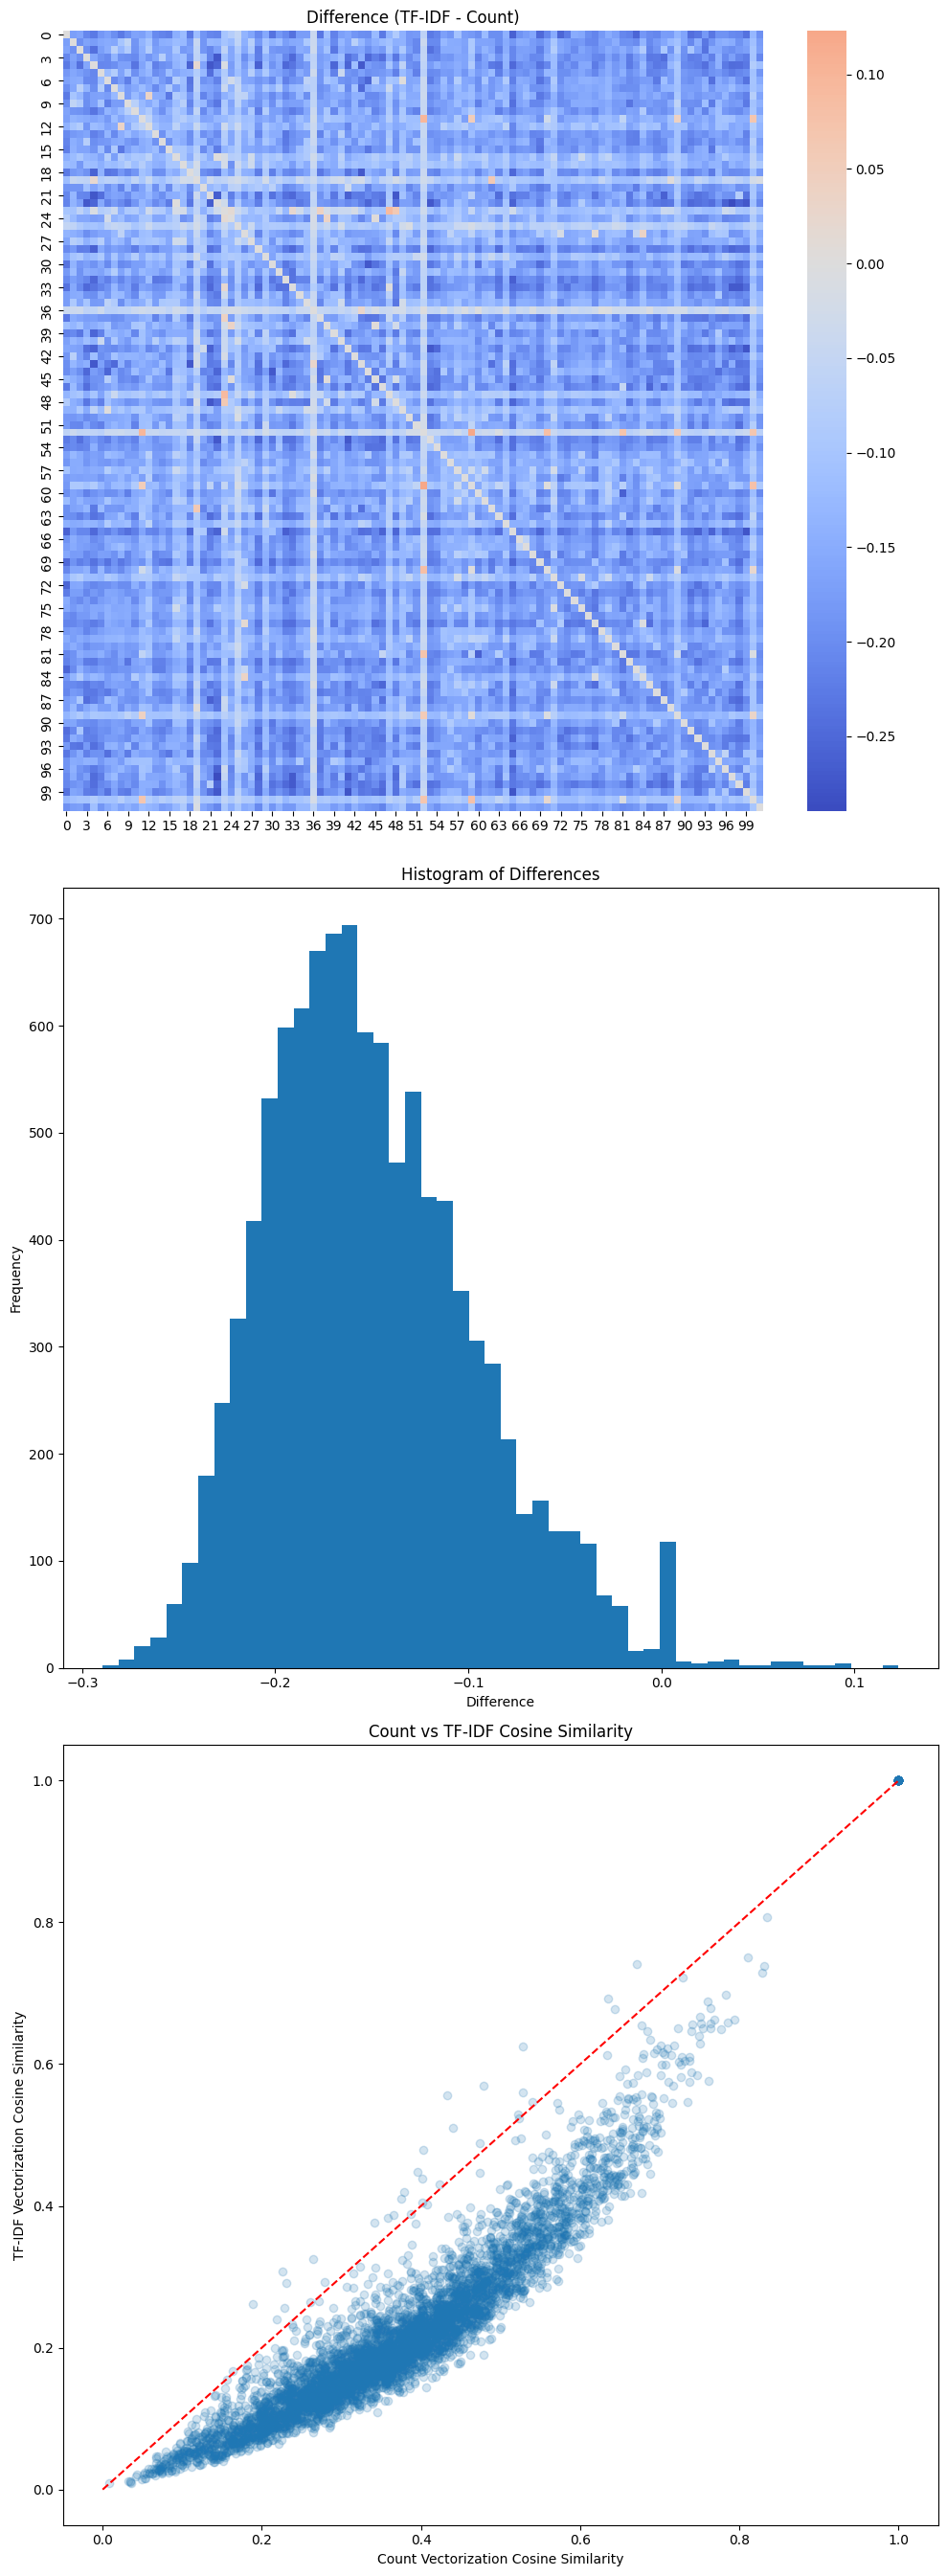

Mean difference: -0.1497
Median difference: -0.1572
Max difference: 0.2894
Max difference at index: (22, 97)
Count similarity at this index: 0.4789
TF-IDF similarity at this index: 0.1895


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compare_cosine_matrices(cosine_count, cosine_tfidf):
  difference_matrix = cosine_tfidf - cosine_count

  mean_diff = np.mean(difference_matrix)
  median_diff = np.median(difference_matrix)
  max_abs_diff = np.max(np.abs(difference_matrix))  # Maximum absolute difference

  fig, axes = plt.subplots(3, 1, figsize=(10, 27))

  sns.heatmap(difference_matrix, cmap='coolwarm', center=0, ax=axes[0])
  axes[0].set_title('Difference (TF-IDF - Count)')

  axes[1].hist(difference_matrix.flatten(), bins=50)
  axes[1].set_title('Histogram of Differences')
  axes[1].set_xlabel('Difference')
  axes[1].set_ylabel('Frequency')

  axes[2].scatter(cosine_count.flatten(), cosine_tfidf.flatten(), alpha=0.1)
  axes[2].plot([0, 1], [0, 1], 'r--')  # Diagonal line
  axes[2].set_xlabel('Count Vectorization Cosine Similarity')
  axes[2].set_ylabel('TF-IDF Vectorization Cosine Similarity')
  axes[2].set_title('Count vs TF-IDF Cosine Similarity')

  plt.tight_layout()
  plt.show()

  print(f"Mean difference: {mean_diff:.4f}")
  print(f"Median difference: {median_diff:.4f}")

  print(f"Max difference: {max_abs_diff:.4f}")
  diff_index = np.unravel_index(np.argmax(np.abs(difference_matrix)), difference_matrix.shape)
  print(f"Max difference at index: {diff_index}")
  print(f"Count similarity at this index: {cosine_count[diff_index]:.4f}")
  print(f"TF-IDF similarity at this index: {cosine_tfidf[diff_index]:.4f}")

compare_cosine_matrices(cosine_count, cosine_tfidf)


In [39]:
from sklearn.cluster import DBSCAN

# distance_matrix = 1 - cosine_count.round(5)
distance_matrix = 1 - cosine_tfidf.round(5)

epsilon = 0.7
min_samples = 5
# 2D data min_samples >= 3
# 3D data min_samples >= 4
# XD data min_samples >= 5

dbscan = DBSCAN(eps=epsilon,min_samples=min_samples,metric='precomputed')
dbscan_labels = dbscan.fit_predict(distance_matrix)
for i,label in enumerate(dbscan_labels):
  if (label == -1):
    print(f'document {i}: cluster {label}')

document 27: cluster -1
document 36: cluster -1


best epsilon: 0.7000000000000001


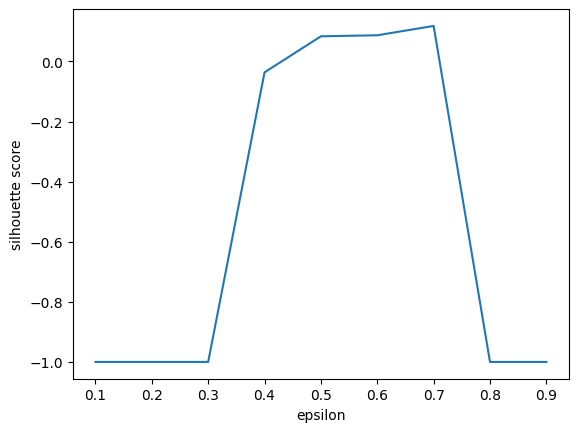

In [40]:
from sklearn.metrics import silhouette_score

epsilons = np.arange(0.1,1.0,0.1)
scores = []

for eps in epsilons:
  dbscan = DBSCAN(eps=eps,min_samples=min_samples,metric='precomputed')
  labels = dbscan.fit_predict(distance_matrix)
  if len(set(labels)) > 1:
    score = silhouette_score(distance_matrix,labels,metric='precomputed')
    scores.append(score)
  else:
    scores.append(-1)

best_epsilon = epsilons[np.argmax(scores)]
print(f'best epsilon: {best_epsilon}')

plt.plot(epsilons,scores)
plt.xlabel('epsilon')
plt.ylabel('silhouette score')
plt.show()

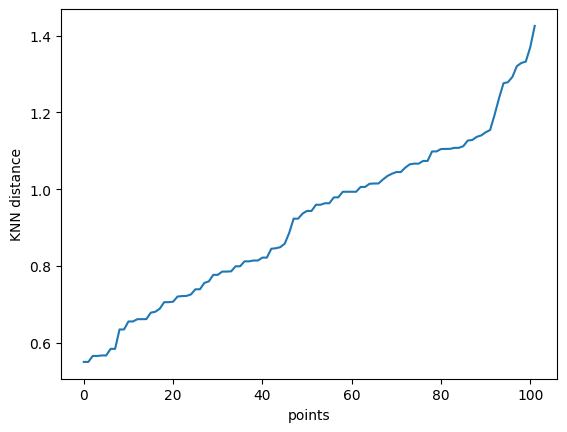

In [41]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors_fit = neighbors.fit(distance_matrix)
distances, indices = neighbors_fit.kneighbors(distance_matrix)

distances = np.sort(distances,axis = 0)
distances = distances[:,1]

plt.plot(distances)
plt.xlabel('points')
plt.ylabel('KNN distance')
plt.show()


In [42]:
for i,cluster in enumerate(dbscan_labels.tolist()):
  if cluster == -1:
    print(df.iloc[i]['title'])
    print()
    print(textwrap.fill(df.iloc[i]['content'],width=120))
    print('----------')

AIS ปรับสิทธิ์ผู้ใช้ HBO GO เป็น Max Standard อัตโนมัติ พร้อมออกราคาพิเศษ 1,190 บาท/ปี

HBO GO ของลูกค้า AIS จะเปลี่ยนเป็นสิทธิ์การใช้งานแพ็กเกจ Max มาตรฐาน (Max Standard) ที่คมชัดขึ้น และดาวน์โหลดได้เยอะขึ้น
โดยอัตโนมัติ ตั้งแต่วันที่ 19 พฤศจิกายน 2567 เป็นต้นไปแพ็กเกจมาตรฐานของ Max
รองรับการสตรีมพร้อมกันบนอุปกรณ์สองเครื่องในครั้งเดียว รับชมได้บนอุปกรณ์ที่หลากหลายขึ้นรวมถึงทีวี
ดาวน์โหลดคอนเทนต์ได้สูงสุดถึง 30 รายการสำหรับลูกค้า AIS ทั้งมือถือและเน็ตบ้าน AIS 3BB Fibre3 ที่มีแพ็กเกจ HBO GO, PLAY
PREMIUM PLUS หรือ PLAY XL อยู่แล้วในปัจจุบัน สามารถสตรีมคอนเทนต์พร้อมรับชม 5 ช่องพรีเมียม HBO, HBO Signature, HBO HITS,
HBO Family, Cinemax ผ่าน AIS PLAY, AIS PLAYBOX และ 3BB GIGATV ได้ตามปกติ แพ็กเกจรายปีของ HBO มีราคาพิเศษที่ 1,190 บาท
หากสมัครภายในวันที่ 18 พฤศจิกายน 2567 ที่มา: ข่าวประชาสัมพันธ์
----------
อินเทลอัพเดตไดรเวอร์จีพียู Arc, Iris Xe ใหม่ ประสิทธิภาพบางเกมดีขึ้นถึง 24%

อินเทลยังเดินหน้าปรับปรุงไดรเวอร์จีพียูของตัวเองเรื่อยๆ หลังจากที่ จีพียู Intel Arc
ช่วงแรกมีปัญหากับเกมเก่าๆแ